In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
#%cd /content/gdrive/My\ Drive 
%cd /content/ 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content


In [2]:
from getpass import getpass
import os

user = getpass('User')
password = getpass('Password')
os.environ['GIT_AUTH'] = user + ':' + password

!git clone https://$GIT_AUTH@github.com/Ace95/DeepLearning_Project.git  

User··········
Password··········
Cloning into 'DeepLearning_Project'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 203229 (delta 49), reused 92 (delta 18), pack-reused 203103
Receiving objects: 100% (203229/203229), 1.44 GiB | 34.44 MiB/s, done.
Resolving deltas: 100% (401/401), done.
Checking out files: 100% (42059/42059), done.


Change to directory of our code

In [4]:
%cd /content/DeepLearning_Project/CNNfromScratch/
%cp /content/gdrive/My\ Drive/DeepLearning_Project/CNNfromScratch/models/CNN4_celeba_model_src_light_10epochs.h5 /content/DeepLearning_Project/CNNfromScratch/models/

/content/DeepLearning_Project/CNNfromScratch


In [5]:
!ls /content/DeepLearning_Project/CNNfromScratch/models/
#!ls /content/DeepLearning_Project/img_align_celeba/

CNN4_celeba_model_src_light_10epochs.h5


## Import and initialization

In [8]:
"""
Created on Fri Apr 17 15:40:21 2020

@author: Nicolaas Ruberg
"""
import os
from os import listdir,path
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
# Some variables
modelFile = '/content/DeepLearning_Project/CNNfromScratch/models/CNN4_celeba_model_src_light_10epochs.h5'
imageShape=(218,178) #Celeba croped image shape
labels = ['center_light', 'left_light','right_light']

print(modelFile)

def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=imageShape)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims
#Store in list the name of the files

def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        
model = load_model(modelFile)


/content/DeepLearning_Project/CNNfromScratch/models/CNN4_celeba_model_src_light_10epochs.h5


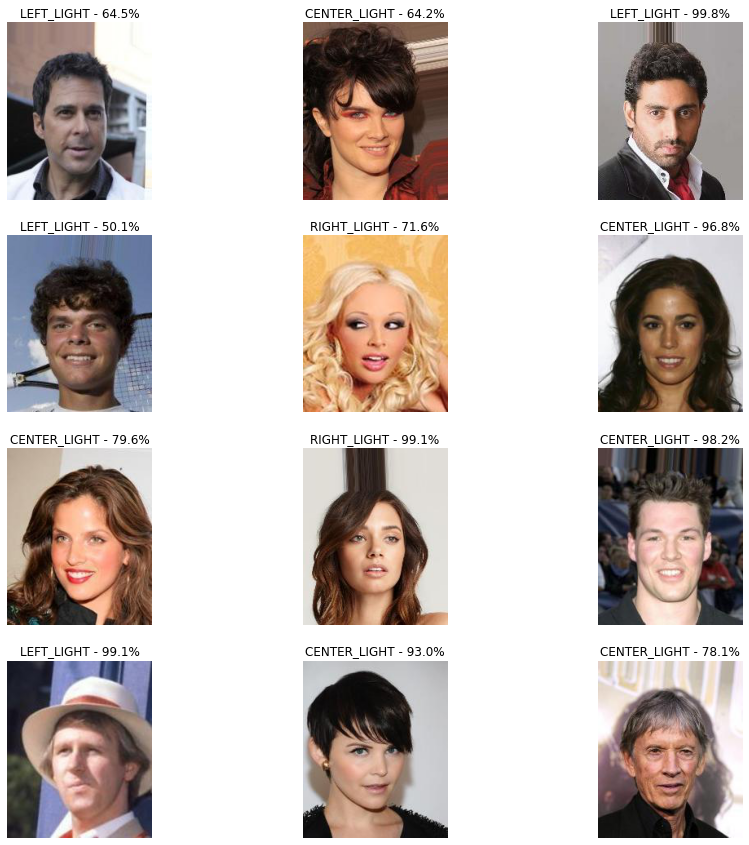

In [12]:
import random
from IPython.display import Image, HTML, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#origDIR='./img_align_celeba'
origDIR='/content/DeepLearning_Project/img_align_celeba/'
#totalFiles= 200598
totalFiles = 12
#startFiles = 0
startFiles = random.randint(1000,9000)
endFiles = startFiles + totalFiles

listOfFiles = getListOfFiles(origDIR)
listOfFiles.sort()
fig = plt.figure(figsize=(15,15))
rowFig = 1
colFig = 1
indexFig = 1

for filename in listOfFiles[startFiles:endFiles]:
    if filename.endswith(('.jpeg','.jpg')):
        x = Image(filename=filename) 
        predictions = model.predict(prepare_image(filename))
        score=0
        index=0
        for i in range(len(labels)):
          if score < predictions[0][i] : 
            score = predictions[0][i]
            index = i
#        print('\t{:8} - {:05.2f}%'.format(labels[index].upper(),predictions[0][index]*100))
        img=mpimg.imread(filename)
        ax = fig.add_subplot(4,3,indexFig)
        ax.title.set_text('{:6} - {:03.1f}%'.format(labels[index].upper(),predictions[0][index]*100))
        ax.axis('off')
        plt.imshow(img)
        indexFig += 1
        if rowFig > 4:
          rowFig = 1
          colFig +=1
        else:
          rowFig += 1
plt.show()
